<a href="https://colab.research.google.com/github/Mananpatel25/Research-paper-codes/blob/main/Researchpaper_EfficientnetB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

img = cv2.imread("/content/drive/MyDrive/RP/test/beach/beach_000084.png")

img.shape

(256, 256, 3)

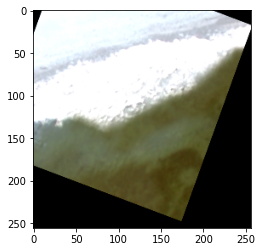

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
train_dir = "/content/drive/MyDrive/RP/train"
test_dir = "/content/drive/MyDrive/RP/test"
val_dir = "/content/drive/MyDrive/RP/validation"

In [ ]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 32
                                           )

test_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         batch_size = 32
                                         )
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       class_mode = "categorical",
                                       batch_size = 32
                                       )

Found 7350 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [ ]:
image, label = train_data.next()
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 21)


In [ ]:
class_label = list(train_data.class_indices.keys())

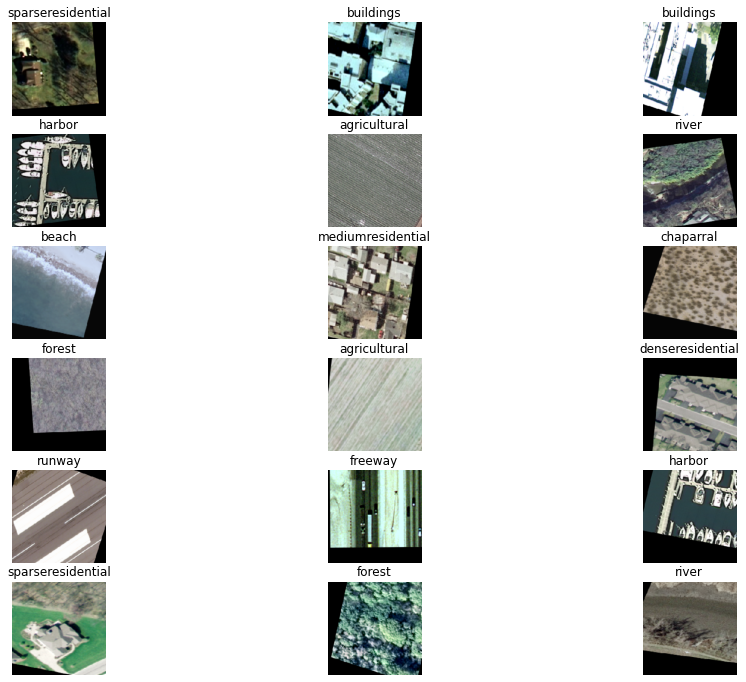

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,12))

image, label = train_data.next()
for i in range(18):
  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(class_label[tf.argmax(label[i])])

  plt.axis("off")

In [ ]:
train_eff = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     label_mode = "categorical",
                                                                     image_size = (224,224),
                                                                     batch_size = 32
                                                                    
                                                                     )

test_eff = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   label_mode = "categorical",
                                                                   image_size = (224,224),
                                                                   batch_size = 32
                                                                   
                                                                   )
val_eff = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                   label_mode = "categorical",
                                                                   image_size = (224,224),
                                                                   batch_size = 32
                                                                   
                                                                   )

Found 7350 files belonging to 21 classes.
Found 1050 files belonging to 21 classes.
Found 2100 files belonging to 21 classes.


In [ ]:
import tensorflow as tf

eff_base = tf.keras.applications.EfficientNetB5(include_top= False)

eff_base.trainable = False

In [ ]:
#buildinb resnet model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(224,224,3))

x = eff_base(inputs)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(21, activation="softmax")(x)

eff_model = tf.keras.Model(inputs, outputs)

In [ ]:
eff_model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [24]:
eff_model.fit( train_eff,
             epochs = 5,
             steps_per_epoch = len(train_eff),
             validation_data = val_eff,
             validation_steps = len(val_eff)
             )

Epoch 1/5
230/230 [==============================] - 2205s 10s/step - loss: 0.0668 - accuracy: 0.9883 - val_loss: 0.1049 - val_accuracy: 0.9676
Epoch 2/5
230/230 [==============================] - 2202s 10s/step - loss: 0.0567 - accuracy: 0.9905 - val_loss: 0.0971 - val_accuracy: 0.9714
Epoch 3/5
230/230 [==============================] - 2196s 10s/step - loss: 0.0500 - accuracy: 0.9918 - val_loss: 0.0921 - val_accuracy: 0.9700
Epoch 4/5
230/230 [==============================] - 2198s 10s/step - loss: 0.0454 - accuracy: 0.9937 - val_loss: 0.0877 - val_accuracy: 0.9743
Epoch 5/5
230/230 [==============================] - 2199s 10s/step - loss: 0.0424 - accuracy: 0.9929 - val_loss: 0.0860 - val_accuracy: 0.9743


In [25]:
print(f"Efficient Accuracy {eff_model.evaluate(val_eff)[1] * 100 : 0.2f} %")

66/66 [==============================] - 488s 7s/step - loss: 0.0860 - accuracy: 0.9743
Efficient Accuracy  97.43 %


In [26]:
labels_name = test_eff.class_names
len(labels_name)

21

1/1 [==============================] - 7s 7s/step


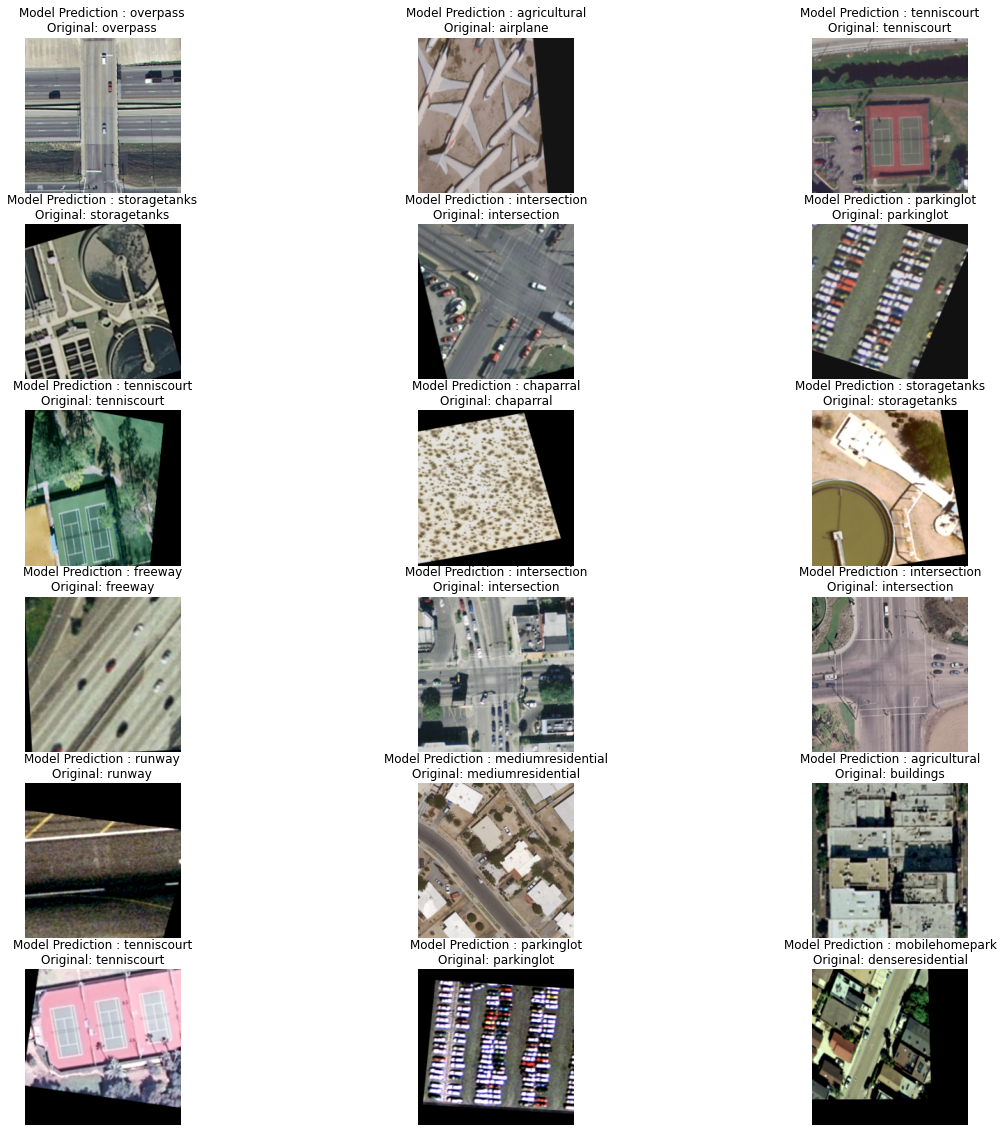

In [28]:
# predicting and visualizing the images

import tensorflow as tf
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))

for image,label in test_eff.take(1):
  model_prediction = eff_model.predict(image)

  for i in range(18):
    plt.subplot(6,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(f"Model Prediction : {labels_name[tf.argmax(tf.round(model_prediction[i]))]}\nOriginal: {labels_name[tf.argmax(label[i])]}")
    plt.axis("off")